In [1]:
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import matplotlib.animation as animation
import scipy as sc
import seaborn as sns

## Fonctions utiles

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
n_runs = len(meta)
n_wins = 464
dfc_train_propofol = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_test_propofol = dfc[(meta["monkey"] == "jade") & meta["condition"].isin(['deep-propofol','light-propofol'])].reshape((-1, n_wins, 82, 82))
dfc_all = dfc.reshape((-1, n_wins, 82, 82))
dfc_train_background = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana'])].reshape((-1, n_wins, 82, 82))
dfc_test_background = dfc[(meta["monkey"] == "jade")].reshape((-1, n_wins, 82, 82))
conditions_train = meta["condition"][meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
conditions_test = meta["condition"][meta["monkey"].isin(['jade']) & meta["condition"].isin(['deep-propofol','light-propofol'])]
dict_conditions = {"light-propofol":0, "deep-propofol":1}
labels_train = [dict_conditions[elem] for elem in conditions_train]
labels_test = [dict_conditions[elem] for elem in conditions_test]

In [3]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/dfc.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/meta.csv")
iu = np.triu_indices(82,k=1)
dfc_flat = dfc[:,:,iu[0],iu[1]]

id_sessions_awake = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "awake"]
id_sessions_light_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "light-propofol"]
id_sessions_deep_propofol = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "deep-propofol"]
id_sessions_light_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane2"]
id_sessions_deep_sevoflurane = [i for i in range(len(meta)) if meta["condition"].iloc[i] == "sevoflurane4"]

In [4]:
id_sessions_almira = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "almira" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_jade = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "jade" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_khali = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "khali" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_kimiko = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "kimiko" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]
id_sessions_rana = [i for i in range(len(meta)) if meta["monkey"].iloc[i] == "rana" and meta["condition"].iloc[i] in ["awake","sevoflurane2","sevoflurane4"]]

## Contrastive PCA (ma méthode)

In [6]:
dict_labels = {"light-propofol" : 1, "deep-propofol" : 2}
meta_train = meta[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana']) & (meta["condition"].isin(["light-propofol","deep-propofol"]))]["condition"]
labels_train_condition = np.array([meta_train.iloc[i] for i in range(len(meta_train))])
labels_train = np.array([dict_labels[elem] for elem in labels_train_condition]).reshape((len(labels_train_condition)//464,464))

In [7]:
a,b = labels_train.shape
Y = labels_train.reshape((a*b,1))
enc = OneHotEncoder()
Y = sc.sparse.csr_matrix.toarray(enc.fit_transform(Y))
Y = StandardScaler().fit_transform(Y)

In [19]:
alpha = 10
a,b,c = fc_train_anaesthesized_vector.shape
X = fc_train_anaesthesized_vector.reshape((a*b,c))
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = np.concatenate((X,alpha*Y),axis = 1)
C_train = (X.T @ X) / X.shape[0]

In [20]:
eigenvalues,eigenvectors = sc.linalg.eig(C_train)

In [21]:
X_transformed = X @ eigenvectors

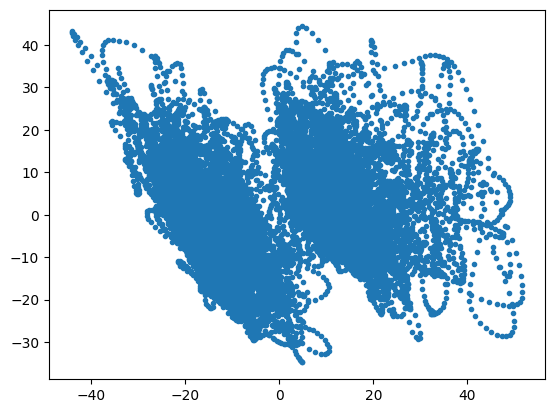

In [22]:
plt.scatter(X_transformed[:,0].flatten(),X_transformed[:,2].flatten(),marker = '.')

In [87]:
eigenvectors_effective[:,0].shape

(3321,)

In [102]:
82*81//2

3321

In [88]:
eigenvectors[0:0,0]

array([], dtype=float64)

In [81]:
eigenvectors[:,0]

array([-1.00327852e-05,  1.22650566e-04, -1.33885405e-06, ...,
        3.20173385e-05,  7.07101103e-01, -7.07101103e-01])

In [31]:
eigenmatrix = package.preprocessing.reconstruct_matrix(torch.from_numpy(eigenvectors_effective[:,4]))

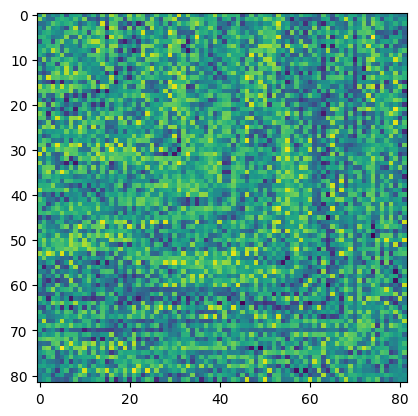

In [32]:
plt.imshow(eigenmatrix.numpy())

In [23]:
eigenvectors_effective = eigenvectors[:-2,:]

"""
a,b,c = fc_train_anaesthesized_vector.shape
X_train_anaesthesized = fc_train_anaesthesized_vector.reshape((a*b,c))
X_train_anaesthesized = scaler.transform(X_train_anaesthesized)
X_train_anaesthesized_transformed = X_train_anaesthesized @ eigenvectors

d,e,f = fc_train_awake_vector.shape
X_train_awake = fc_train_awake_vector.reshape((d*e,f))
X_train_awake = scaler.transform(X_train_awake)
X_train_awake_transformed = X_train_awake @ eigenvectors
"""

a,b,c = fc_train_light_propofol_vector.shape
X_train_light_propofol = fc_train_light_propofol_vector.reshape((a*b,c))
X_train_light_propofol = scaler.transform(X_train_light_propofol)
X_train_light_propofol_transformed = X_train_light_propofol @ eigenvectors_effective

d,e,f = fc_train_deep_propofol_vector.shape
X_train_deep_propofol = fc_train_deep_propofol_vector.reshape((d*e,f))
X_train_deep_propofol = scaler.transform(X_train_deep_propofol)
X_train_deep_propofol_transformed = X_train_deep_propofol @ eigenvectors_effective

"""
a,b,c = fc_test_anaesthesized_vector.shape
X_test_anaesthesized = fc_test_anaesthesized_vector.reshape((a*b,c))
X_test_anaesthesized = scaler.transform(X_test_anaesthesized)
X_test_anaesthesized_transformed = X_test_anaesthesized @ eigenvectors

d,e,f = fc_test_awake_vector.shape
X_test_awake = fc_test_awake_vector.reshape((d*e,f))
X_test_awake = scaler.transform(X_test_awake)
X_test_awake_transformed = X_test_awake @ eigenvectors
"""

a,b,c = fc_test_light_propofol_vector.shape
X_test_light_propofol = fc_test_light_propofol_vector.reshape((a*b,c))
X_test_light_propofol = scaler.transform(X_test_light_propofol)
X_test_light_propofol_transformed = X_test_light_propofol @ eigenvectors_effective

d,e,f = fc_test_deep_propofol_vector.shape
X_test_deep_propofol = fc_test_deep_propofol_vector.reshape((d*e,f))
X_test_deep_propofol = scaler.transform(X_test_deep_propofol)
X_test_deep_propofol_transformed = X_test_deep_propofol @ eigenvectors_effective

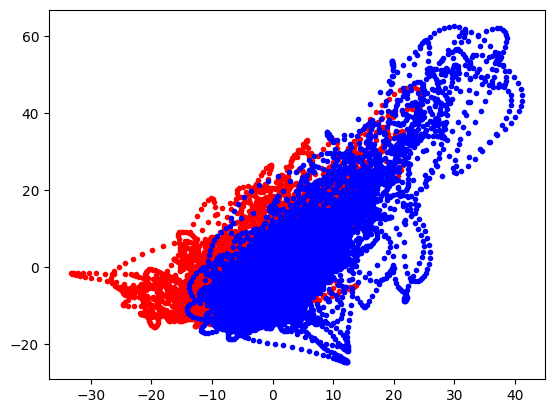

In [24]:
plt.scatter(X_train_deep_propofol_transformed[:,0].flatten(),X_train_deep_propofol_transformed[:,1].flatten(),marker='.',c = "r")
plt.scatter(X_train_light_propofol_transformed[:,0].flatten(),X_train_light_propofol_transformed[:,1].flatten(),marker='.', c = "b")

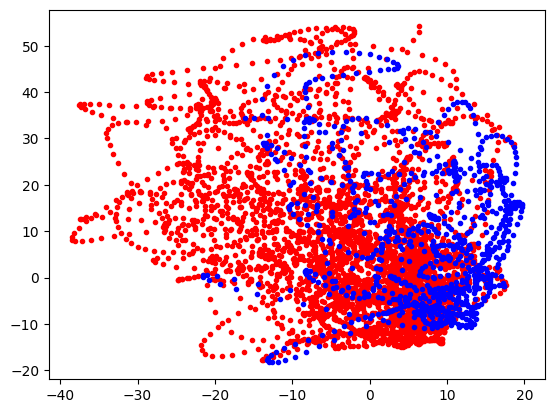

In [59]:
plt.scatter(X_test_deep_propofol_transformed[:,2].flatten(),X_test_deep_propofol_transformed[:,1].flatten(),marker='.',c = "r")
plt.scatter(X_test_light_propofol_transformed[:,2].flatten(),X_test_light_propofol_transformed[:,1].flatten(),marker='.', c = "b")
#plt.scatter(X_test_awake_transformed[:,0].flatten(),X_test_awake_transformed[:,1].flatten(),marker='.')

## Méthode du papier

### Deep vs Light propofol

In [5]:
id_sessions_sevoflurane = np.concatenate([id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_awake_sevoflurane = np.concatenate([id_sessions_awake,id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane]).astype(int)
id_sessions_awake_propofol = np.concatenate([id_sessions_awake,id_sessions_light_propofol,id_sessions_deep_propofol]).astype(int)
id_sessions_subject = np.concatenate([id_sessions_almira,id_sessions_rana,id_sessions_jade,id_sessions_khali,id_sessions_kimiko]).astype(int)
X = dfc_flat[id_sessions_sevoflurane,:,:].reshape(-1,3321)
Y_sevoflurane = dfc_flat[id_sessions_awake_sevoflurane,:,:].reshape(-1,3321)
Y_almira = dfc_flat[id_sessions_almira,:,:].reshape(-1,3321)
Y_jade = dfc_flat[id_sessions_jade,:,:].reshape(-1,3321)
Y_khali = dfc_flat[id_sessions_khali,:,:].reshape(-1,3321)
Y_kimiko = dfc_flat[id_sessions_kimiko,:,:].reshape(-1,3321)
Y_rana = dfc_flat[id_sessions_rana,:,:].reshape(-1,3321)
labels = [[0]*len(id_sessions_light_sevoflurane)*461 + [1]*len(id_sessions_deep_sevoflurane)*461]
dfc_sevoflurane = dfc_flat[id_sessions_awake_sevoflurane,:,:].reshape(-1,3321)
dfc_propofol = dfc_flat[id_sessions_awake_propofol,:,:].reshape(-1,3321)
dfc_subjects = dfc_flat[id_sessions_subject,:,:].reshape(-1,3321)

In [12]:
np.mean(X,axis = 0).shape

(3321,)

In [32]:
alpha = 0.5

C_X = ((X-np.mean(X,axis = 0)).T @ (X- np.mean(X,axis = 0))) / X.shape[0]
C_Y_sevoflurane = ((Y_sevoflurane-np.mean(Y_sevoflurane,axis=0)).T @ (Y_sevoflurane-np.mean(Y_sevoflurane,axis=0))) / Y_sevoflurane.shape[0]
C_Y_almira = ((Y_almira-np.mean(Y_almira,axis=0)).T @ (Y_almira-np.mean(Y_almira,axis=0))) / Y_almira.shape[0]
C_Y_jade = ((Y_jade-np.mean(Y_jade,axis=0)).T @ (Y_jade-np.mean(Y_jade,axis=0))) / Y_jade.shape[0]
C_Y_khali = ((Y_khali-np.mean(Y_khali,axis=0)).T @ (Y_khali-np.mean(Y_khali,axis=0))) / Y_khali.shape[0]
C_Y_kimiko = ((Y_kimiko-np.mean(Y_kimiko,axis=0)).T @ (Y_kimiko-np.mean(Y_kimiko,axis=0))) / Y_kimiko.shape[0]
C_Y_rana = ((Y_rana-np.mean(Y_rana,axis=0)).T @ (Y_rana-np.mean(Y_rana,axis=0))) / Y_rana.shape[0]

C = C_X - alpha * (C_Y_jade - C_Y_almira - C_Y_khali - C_Y_kimiko - C_Y_rana)

In [33]:
eig = np.linalg.eig(C)
w, v = eig
n_components = 10
eig_idx = np.argpartition(np.abs(w), -n_components)[-n_components:]
eig_idx = eig_idx[np.argsort(-np.abs(w[eig_idx]))]
v_top = v[:,eig_idx]
reduced_dataset = X.dot(v_top)
dfc_sevoflurane_reduced = dfc_sevoflurane.dot(v_top)
dfc_propofol_reduced = dfc_propofol.dot(v_top)
dfc_subject_reduced = dfc_subjects.dot(v_top)
#reduced_dataset[:,0] = reduced_dataset[:,0]*np.sign(reduced_dataset[0,0])
#reduced_dataset[:,1] = reduced_dataset[:,1]*np.sign(reduced_dataset[0,1])

In [42]:
meta["condition"][meta["monkey"] == "rana"].unique()

array(['ketamine', 'light-propofol', 'deep-propofol', 'sevoflurane2',
       'sevoflurane4'], dtype=object)

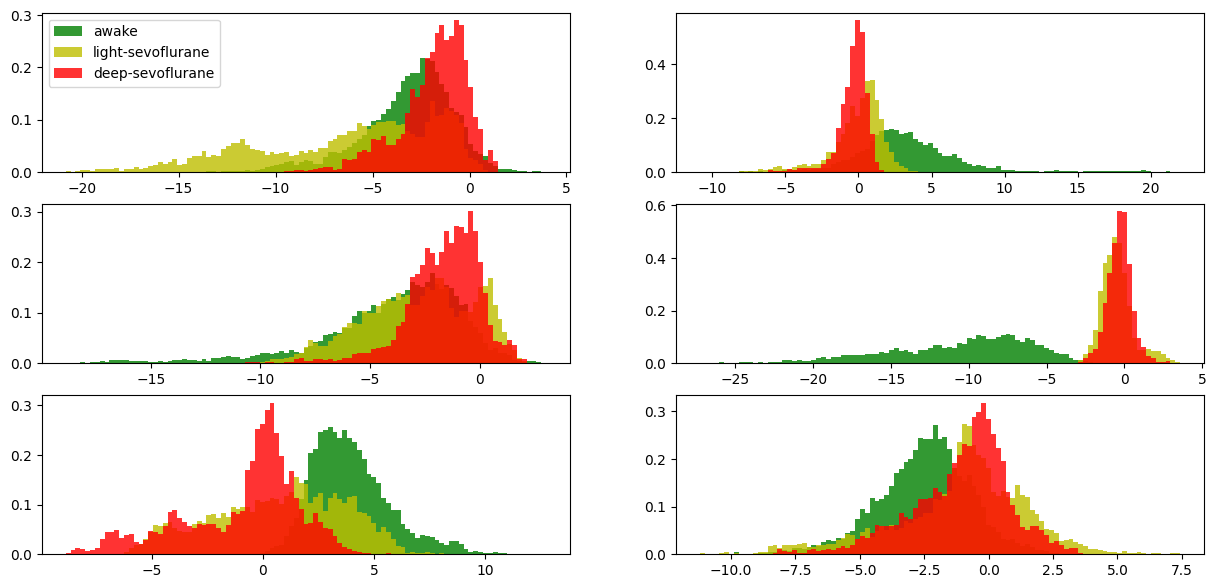

In [34]:
k = len(id_sessions_awake)
n = len(id_sessions_light_sevoflurane)
m = len(id_sessions_deep_sevoflurane)

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,12))

for i in range(6):
    v_min = np.min(dfc_sevoflurane_reduced[:,i])
    v_max = np.max(dfc_sevoflurane_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_awake,_ = np.histogram(dfc_sevoflurane_reduced[:k*461,i].flatten(),bins)
    counts_light_sevoflurane,_ = np.histogram(dfc_sevoflurane_reduced[k*461:(n+k)*461,i].flatten(),bins)
    counts_deep_sevoflurane,_ = np.histogram(dfc_sevoflurane_reduced[(n+k)*461:,i].flatten(),bins)
    fig.add_subplot(5, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_light_sevoflurane,density = True,label="light-sevoflurane",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_deep_sevoflurane,density = True,label="deep-sevoflurane",color="r",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

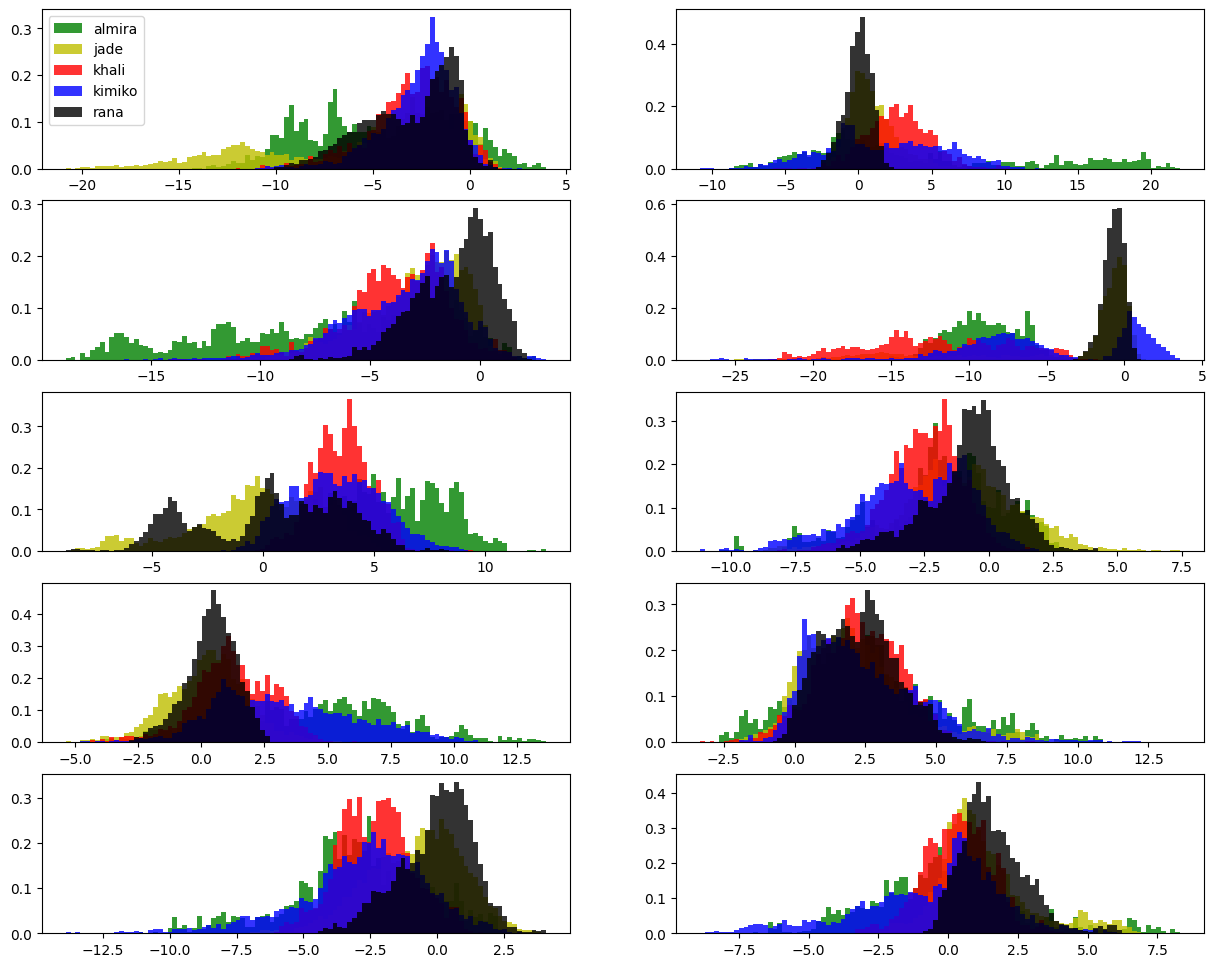

In [35]:
a = len(id_sessions_almira)
b = len(id_sessions_jade)
c = len(id_sessions_khali)
d = len(id_sessions_kimiko)
e = len(id_sessions_rana)

compteur = 0
bins = np.linspace(-10,10,100)

fig = plt.figure(figsize=(15,12))

for i in range(10):
    v_min = np.min(dfc_subject_reduced[:,i])
    v_max = np.max(dfc_subject_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_almira,_ = np.histogram(dfc_subject_reduced[:a*461,i].flatten(),bins)
    counts_jade,_ = np.histogram(dfc_subject_reduced[a*461:(a+b)*461,i].flatten(),bins)
    counts_khali,_ = np.histogram(dfc_subject_reduced[(a+b)*461:(a+b+c)*461,i].flatten(),bins)
    counts_kimiko,_ = np.histogram(dfc_subject_reduced[(a+b+c)*461:(a+b+c+d)*461,i].flatten(),bins)
    counts_rana,_ = np.histogram(dfc_subject_reduced[(a+b+c+d)*461:(a+b+c+d+e)*461,i].flatten(),bins)
    fig.add_subplot(5, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_almira,density = True,label="almira",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_jade,density = True,label="jade",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_khali,density = True,label="khali",color="r",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_kimiko,density = True,label="kimiko",color="b",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_rana,density = True,label="rana",color="k",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
#plt.text(-40, 0.7, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [43]:
print(meta["condition"][meta["monkey"] == "almira"].unique())
print(meta["condition"][meta["monkey"] == "jade"].unique())
print(meta["condition"][meta["monkey"] == "khali"].unique())
print(meta["condition"][meta["monkey"] == "kimiko"].unique())
print(meta["condition"][meta["monkey"] == "rana"].unique())

['awake']
['awake' 'light-propofol' 'deep-propofol' 'sevoflurane2' 'sevoflurane4']
['awake' 'ketamine' 'light-propofol' 'deep-propofol']
['ketamine' 'sevoflurane2' 'sevoflurane4']
['ketamine' 'light-propofol' 'deep-propofol' 'sevoflurane2' 'sevoflurane4']


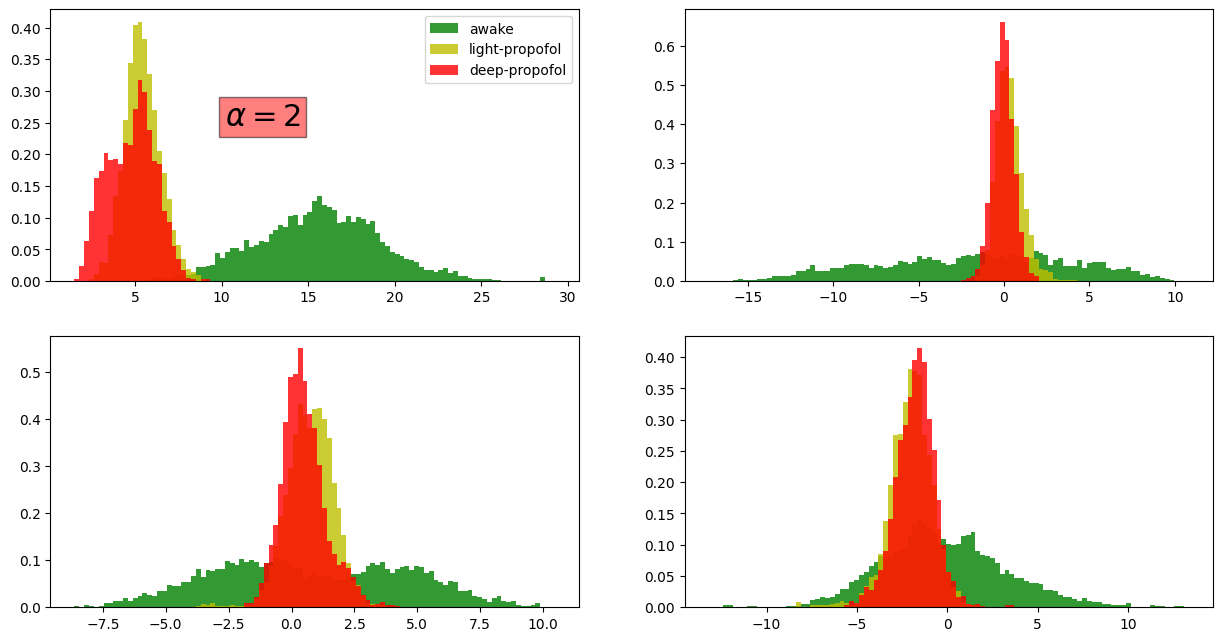

In [57]:
compteur = 0
bins = np.linspace(-10,10,100)

k = len(id_sessions_awake)
n = len(id_sessions_light_propofol)
m = len(id_sessions_deep_propofol)

fig = plt.figure(figsize=(15,12))

for i in range(4):
    v_min = np.min(dfc_propofol_reduced[:,i])
    v_max = np.max(dfc_propofol_reduced[:,i])
    bins = np.linspace(v_min,v_max,100)
    counts_awake,_ = np.histogram(dfc_propofol_reduced[:k*461,i].flatten(),bins)
    counts_light_propofol,_ = np.histogram(dfc_propofol_reduced[k*461:(n+k)*461,i].flatten(),bins)
    counts_deep_propofol,_ = np.histogram(dfc_propofol_reduced[(n+k)*461:,i].flatten(),bins)
    fig.add_subplot(3, 2, i+1)
    plt.hist(bins[:-1], bins, weights=counts_awake,density = True,label="awake",color="g",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_light_propofol,density = True,label="light-propofol",color="y",alpha=0.8)
    plt.hist(bins[:-1], bins, weights=counts_deep_propofol,density = True,label="deep-propofol",color="r",alpha=0.8)
    if i == 0:
        plt.legend()
    compteur += 1 
plt.text(-40, 0.77, '$\\alpha = 2$', fontsize=22, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

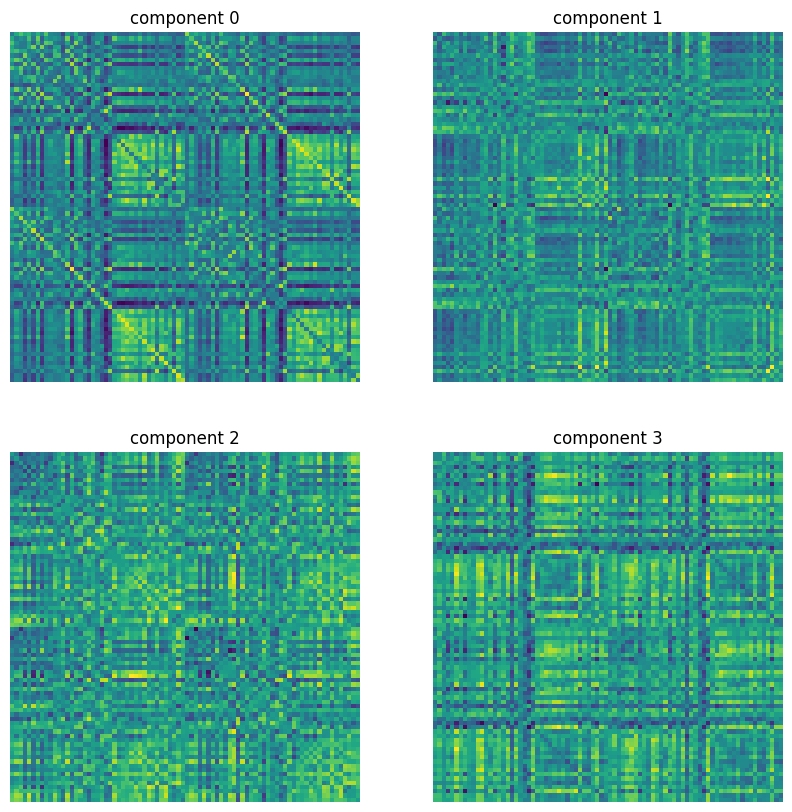

In [58]:
fig = plt.figure(figsize=(10,10))

for i in range(4):
    im = np.zeros((82,82))
    iu = np.triu_indices(82,k=1)
    il = np.tril_indices(82,k=-1)
    im[iu[0],iu[1]] = v_top[:,i]
    im = np.transpose(im)
    im[iu[0],iu[1]] = v_top[:,i]
    fig.add_subplot(2,2,i+1)
    plt.imshow(im)
    plt.axis("off")
    plt.title(label="component {}".format(i))
plt.show()

In [186]:
dfc_reduced_sessions = dfc_reduced.reshape(-1,461,10)

In [194]:
dfc_reduced_sessions.shape

(74, 461, 10)

In [197]:
k

20

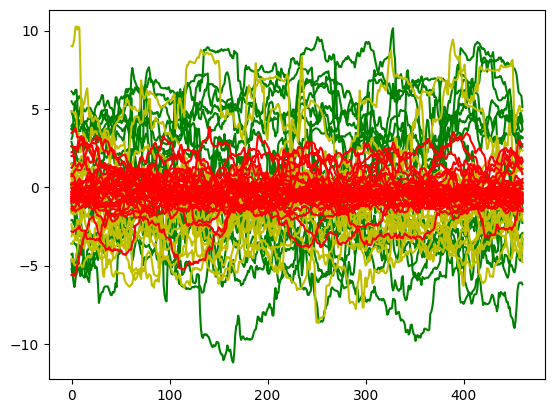

In [213]:
for i in range(dfc_reduced_sessions.shape[0]):
    if i < k:
        plt.plot(dfc_reduced_sessions[i,:,4],color="g")
    elif k <= i and i < n+k:
        plt.plot(dfc_reduced_sessions[i,:,4],color="y")
    else : 
        plt.plot(dfc_reduced_sessions[i,:,4],color="r")
plt.show()